In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# Data Manipulation

* Extract the 5th column and store it in ‘customer_5’
* Extract the 15th column and store it in ‘customer_15’
* Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’
* Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’
* Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’
* Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’
* Get the count of different levels from the ‘Churn’ column

In [5]:
#Extract the 5th column and store it in ‘customer_5’
customer_5 = data.iloc[4]
customer_5

customerID                9237-HQITU
gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                             2
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                  70.7
TotalCharges                  151.65
Churn                            Yes
Name: 4, dtype: object

In [6]:
#Extract the 15th column and store it in ‘customer_5’
customer_15 = data.iloc[14]
customer_15

customerID                5129-JLPIS
gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                            25
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                   Yes
OnlineBackup                      No
DeviceProtection                 Yes
TechSupport                      Yes
StreamingTV                      Yes
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 105.5
TotalCharges                 2686.05
Churn                             No
Name: 14, dtype: object

In [7]:
#Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

senior_male_electronic = data.loc[(data['gender'] == 'Male')
                                  & (data['SeniorCitizen'] == 1)
                                  & (data['PaymentMethod'] == 'Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [8]:
#Extract all those customers whose tenure is greater than 70 months
#or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’

customer_total_tenure = data.loc[(data['tenure'] > 70) | (data['MonthlyCharges'] > 100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [9]:
#Extract all the customers whose contract is of two years,
#payment method is mailed check and the value of churn is ‘Yes’
#and store the result in ‘two_mail_yes’

two_mail_yes = data.loc[(data['Contract'] == 'Two year')
                        & (data['PaymentMethod'] == 'Mailed check')
                        & (data['Churn'] == 'Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [10]:
#Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’

customer_333 = data.sample(333, random_state = 14)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6775,3259-KNMRR,Male,1,No,No,57,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),79.75,4438.2,No
368,9571-EDEBV,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),98.65,6962.85,No
5822,9112-WSNPU,Female,1,No,No,35,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.55,2419,No
2080,9919-FZDED,Male,1,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),84.10,5981.65,No
350,0513-RBGPE,Male,0,Yes,Yes,37,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),62.80,2278.75,No


In [11]:
#Get the count of different levels from the ‘Churn’ column

data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Visualization

* Build a bar-plot for the ’InternetService’ column:
    * a. Set x-axis label to ‘Categories of Internet Service’
    * b. Set y-axis label to ‘Count of Categories’
    * c. Set the title of plot to be ‘Distribution of Internet Service’
    * d. Set the color of the bars to be ‘orange’

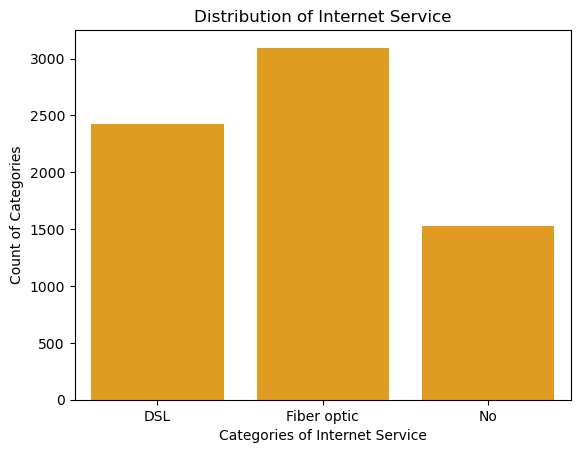

In [12]:
sns.countplot(x = 'InternetService',
              color = 'orange',
              data = data)
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

* Build a histogram for the ‘tenure’ column:
    * a. Set the number of bins to be 30
    * b. Set the color of the bins to be ‘green’
    * c. Assign the title ‘Distribution of tenure’

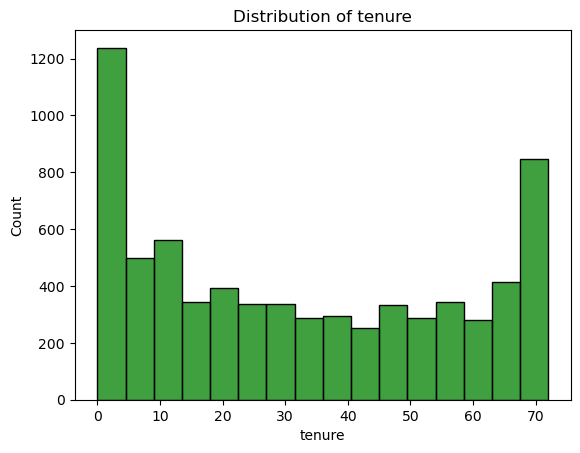

In [13]:
sns.histplot(data['tenure'],
             color = 'green')
plt.title('Distribution of tenure')
plt.show()

* Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
    * a. Assign the points a color of ‘brown’
    * b. Set the x-axis label to ‘Tenure of customer’
    * c. Set the y-axis label to ‘Monthly Charges of customer’
    * d. Set the title to ‘Tenure vs Monthly Charges’

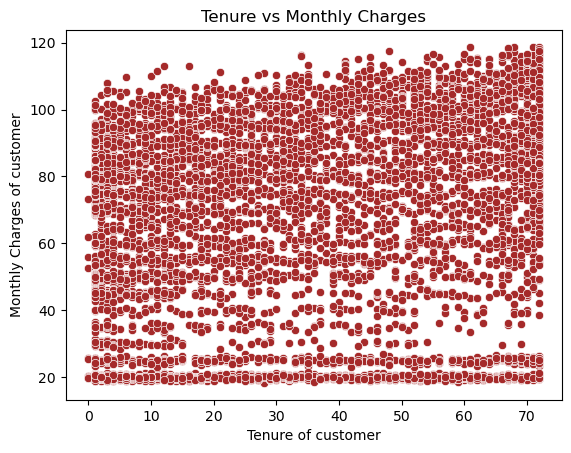

In [14]:
sns.scatterplot(x = 'tenure',
                y = 'MonthlyCharges',
                data = data,
                color = 'brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis and ‘Contract’ on the x-axis

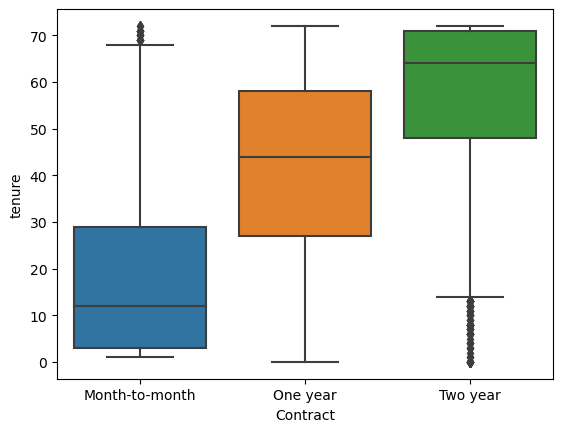

In [15]:
sns.boxplot(x = 'Contract',
            y = 'tenure',
            data = data)
plt.show()

# Linear Regression

* Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
    * a. Divide the dataset into train and test sets in 70:30 ratio.
    * b. Build the model on train set and predict the values on test set
    * c. After predicting the values, find the root mean square error
    * d. Find out the error in prediction & store the result in ‘error’
    * e. Find the root mean square error

In [16]:
import statsmodels.api as sm

X = sm.add_constant(data['tenure'])
y = data['MonthlyCharges']

In [17]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)

In [18]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MonthlyCharges   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     327.6
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           6.10e-71
Time:                        21:00:36   Log-Likelihood:                -23626.
No. Observations:                4930   AIC:                         4.726e+04
Df Residuals:                    4928   BIC:                         4.727e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.1502      0.690     79.933      0.000      53.798      56.503
tenure         0.3062      0.017     18.100      0.000       0.273       0.339
==============================================================================
Omnibus:                     2627.562   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.114
Skew:                          -0.365   Prob(JB):                     5.78e-82
Kurtosis:                       1.865   Cond. No.                         67.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
predictions = model.predict(X_test)
predictions

6775    72.604641
368     76.891703
5822    65.867829
2080    77.197922
350     66.480267
          ...    
4780    57.906142
4411    72.604641
6012    56.681267
1156    71.379766
2326    77.197922
Length: 2113, dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error as mse

error = np.sqrt(mse(y_test, predictions))
error

29.09262802980807

# Logistic Regression

## Simple Logistic Regression

* Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
    * Divide the dataset in 65:35 ratio
    * Build the model on train set and predict the values on test set
    * Build the confusion matrix and get the accuracy score

In [21]:
X = data['MonthlyCharges'].values.reshape(-1, 1)
y = data['Churn'].map({'No':0, 'Yes':1})

In [22]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.35, random_state = 14)

In [23]:
from sklearn.linear_model import LogisticRegression
simple_log_reg = LogisticRegression().fit(X, y)
predictions = simple_log_reg.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
cm

array([[1840,    0],
       [ 626,    0]], dtype=int64)

In [25]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7461476074614761

## Multiple Logistic Regression

* Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
    * Divide the dataset in 80:20 ratio
    * Build the model on train set and predict the values on test set
    * Build the confusion matrix and get the accuracy score

In [26]:
X = data[['tenure', 'MonthlyCharges']]
y = data['Churn'].map({'No':0, 'Yes':1})

In [27]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

In [28]:
simple_log_reg = LogisticRegression().fit(X, y)
predictions = simple_log_reg.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
cm = confusion_matrix(y_test, predictions)
cm

array([[963,  99],
       [177, 170]], dtype=int64)

In [30]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8041163946061036

# Decision Tree

* Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
    * a. Divide the dataset in 80:20 ratio
    * b. Build the model on train set and predict the values on test set
    * c. Build the confusion matrix and calculate the accuracy

In [31]:
X = data['tenure'].values.reshape(-1, 1)
y = data['Churn'].map({'No':0, 'Yes':1})

In [32]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy').fit(X, y)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
cm = confusion_matrix(y_test, predictions)
cm

array([[957, 105],
       [222, 125]], dtype=int64)

In [35]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7679205110007097

# Random Forest

* Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
    * a. Divide the dataset in 70:30 ratio
    * b. Build the model on train set and predict the values on test set
    * c. Build the confusion matrix and calculate the accuracy

In [36]:
X = data[['tenure', 'MonthlyCharges']]
y = data['Churn'].map({'No':0, 'Yes':1})

In [37]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy').fit(X, y)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
cm = confusion_matrix(y_test, predictions)
cm

array([[1340,  238],
       [ 278,  257]], dtype=int64)

In [40]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7557974443918599